# Analysis of Vodafone users' fluxes

The study of the flux of people inside urban areas is of paramount importance to achieve an optimal understanding of emerging critical issues in the local mobility, and to explore areas of potential improvements in the infrastructures and local transports.<br>
The mobility of users within and toward Padova has been monitored using the data provided by the Vodafone mobile carrier, which provides the information based on the users' connections to the network cells.<br>
The data provided by the carrier encompasses the monitoring of the users connected to the Vodafone network in Padova in a four-month period from February to May of 2018.<br>
To provide statistical insights on the number and the flow of users, the data is aggregated based on the origin and movements of the users by averaging the number of connections during the time of the monitoring.<br>
To further avoid privacy violation issues, all observations with less than 30 units (e.g. day-areas for which  <30 users have contributed) have been discarded and/or merged into dedicated categories (indicated with "altro", or "other").<br>

## Datasets 

The data is provided in .csv files.

* __day_od.csv__: table of user' origins and destinations averaged by the day of the week. The data is provided with details of the month, type of user  (resident in Padova/Italian visitor/foreign visitor), country of provenance, together with the province and comune of the user (if available).
* __distinct_users_day.csv__: table of the number of distinct users by origin. The data is provided with details of the month, type of user  (resident in Padova/Italian visitor/foreign visitor), country of provenance, together with the province and comune of the user (if available).

The information is stored in the fields according to the following scheme: 

- MONTH: month analyzed
- DOW: day analyzed
- ORIGIN: user' origin area
- DESTINATION: user' destination area
- CUST_CLASS: user type (resident / Italian visitor / foreigner visitor)
- COD_COUNTRY: user' country code (e.g. 222=Italy)
- COD_PRO: user' province code (e.g. 12=Varese) 
- PRO_COM: user' comune code (e.g. 12026=Busto Arsizio)
- FLOW: number of movements for given date-time (with a minimum of 30 users)
- VISITORS: overall number of users 

Together with the data files, three lookup tables are provided to allow matching the ISTAT country, province and comune codes to the actual names.

* __codici_istat_comune.csv__: lookup file containing the _comune_ ISTAT code-names mapping
* __codici_istat_provincia.csv__: lookup file containing the _province_ ISTAT code-names mapping
* __codici_nazioni.csv__: lookup file containing mapping the _country_ code to its name

Additional information, useful for the study of the flow of users, as the number of inhabitants of each province and the distance between Padova and all other Italian provinces can be extracted based on the data collected by the ISTAT (e.g. http://dati.istat.it/Index.aspx?lang=en&SubSessionId=bcd553a8-280a-4b08-afee-cf7a72fd2ad9, http://www.istat.it/storage/cartografia/matrici_distanze/Veneto.zip)

## Assignment

1. Data preparation: the csv files are originated from different sources, hence resulting in differences in the encoding and end-of-lines that have to be taken into account in the data preparation phase. Make sure each .csv file is properly interpreted.
* Ranking of visitors from foreign countries: based on the number of total visitors per each country, create a ranked plot of the first 20 countries with the most visitors
* Ranking of Italian visitors by province, weighted by the number of inhabitants: based on the number of total visitors per Italian province, create a ranked plot of the first 20 provinces with the most visitors taking into account the number of inhabitants.
* Study of the visitors' fluxes: let's assume to be asked to provide indications of how to invest resources to improve the mobility toward Padova. Defined the three main directions of visitors and commuter getting to Padova by the Italian highways (sud: A13 toward Bologna-Roma / west: A4 toward Milano-Torino / north-east: A4 toward Venice-Trieste), evaluate which of the three directions has to be prioritized:
 1. Consider a simplified case involving only the mid-range mobility, based on the number of visitors/commuters from the nearby regions only
 * Consider the provinces located on the three directions that are mostly contributing to the flow of weekend visitors and working daily commuters by performing a more detailed study of the fluxes based on the day of the week
 * _[OPEN]_ Use the data available to provide what you believe is the best possible answer 
* Plot the distribution of the number of visitors by the distance of the province of origin. Determine which kind of law should be used to describe the distribution.
 1. Assuming an analityc form can be used to describe the trend, create a regression to estimate the expected number of visitors by the distance of the province of origin. Illustrate the difference between the resulting regression with respect to the numbers provided by the Vodafone monitoring, and highlight the five most striking discrepancies from the expectations.
* _[OPEN]_ Use all the data available (and additional data from the ISTAT sources if needed) to extract another interesting information concerning the mobility and the flux of visitors and commuters

### Contacts

* Marco Zanetti <marco.zanetti@unipd.it>
* Jacopo Pazzini <jacopo.pazzini@unipd.it>

In [32]:
import pandas as pd

# read the data from the csv file
df = pd.read_csv("/Users/elifseven/Desktop/pythonProject/LCP_projects_Y2-Group6/data/distinct_users_day.csv",encoding='latin1')

df
#df.describe()


,DOW,CUST_CLASS,COD_COUNTRY,COD_PRO,PRO_COM,VISITORS
0,Mercoledì,visitor,222.0,35.0,35033.0,968
1,Lunedì,visitor,222.0,22.0,22098.0,64
2,Domenica,visitor,222.0,52.0,52032.0,516
3,Giovedì,visitor,222.0,108.0,108009.0,128
4,Giovedì,visitor,222.0,29.0,29048.0,512
...,...,...,...,...,...,...
12840,Mercoledì,foreigner,259.0,NaN,NaN,176
12841,Sabato,foreigner,602.0,NaN,NaN,164
12842,Giovedì,foreigner,732.0,NaN,NaN,80
12843,Giovedì,foreigner,297.0,NaN,NaN,80


In [33]:
#2
search_values = ['foreigner']
df = df[df.CUST_CLASS.str.contains('|'.join(search_values ))]

In [35]:
df2 = df.groupby(['COD_COUNTRY'])[["VISITORS"]].sum()

  ##kendi codeların visitorlerini kendi aralarında topladı, sadece foreignlerin
df2

,VISITORS
COD_COUNTRY,
202.0,7960
204.0,70432
206.0,25380
208.0,129672
214.0,71872
...,...
724.0,8544
730.0,1640
732.0,496


In [36]:
df2.sort_values('VISITORS', inplace=True, ascending=False)
print(df2.head(n=20))
df2 = df2.head(n=20)

             VISITORS
COD_COUNTRY          
208.0          129672
228.0          116884
262.0          109176
460.0          107796
232.0           96776
214.0           71872
204.0           70432
310.0           64160
226.0           59012
234.0           46180
250.0           42424
216.0           30344
219.0           26504
293.0           25760
206.0           25380
284.0           21472
260.0           18580
440.0           13032
230.0           13004
334.0           12552


NameError: name 'plot' is not defined

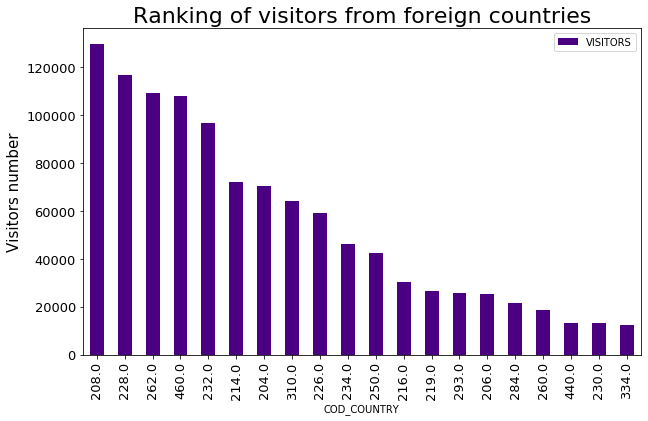

In [105]:
ax = df2.plot(kind='bar', figsize=(10,6), color="indigo", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Ranking of visitors from foreign countries", fontsize=22)
ax.set_ylabel("Visitors number", fontsize=15);
plot.show()

In [95]:
#3
dff = pd.read_csv("/Users/elifseven/Desktop/pythonProject/LCP_projects_Y2-Group6/data/distinct_users_day.csv",encoding='latin1')

dff[dff['COD_COUNTRY'] == 222]

,DOW,CUST_CLASS,COD_COUNTRY,COD_PRO,PRO_COM,VISITORS
0,Mercoledì,visitor,222.0,35.0,35033.0,968
1,Lunedì,visitor,222.0,22.0,22098.0,64
2,Domenica,visitor,222.0,52.0,52032.0,516
3,Giovedì,visitor,222.0,108.0,108009.0,128
4,Giovedì,visitor,222.0,29.0,29048.0,512
...,...,...,...,...,...,...
12828,Martedì,visitor,222.0,65.0,65052.0,36
12829,Giovedì,visitor,222.0,22.0,22017.0,40
12830,Martedì,visitor,222.0,16.0,16053.0,36
12831,Venerdì,visitor,222.0,78.0,78031.0,36


In [102]:
dff = dff.groupby(['COD_PRO'])[["VISITORS"]].sum()

dff

,VISITORS
COD_PRO,
1.0,39068
15.0,177380
17.0,34416
20.0,30212
21.0,28036
22.0,65148
23.0,181604
24.0,431952
25.0,46992


In [103]:
dff.sort_values('VISITORS', inplace=True, ascending=False)
print(dff.head(n=20))
dff = dff.head(n=20)

         VISITORS
COD_PRO          
28.0      3125884
27.0       620236
24.0       431952
26.0       317224
23.0       181604
15.0       177380
29.0       163464
58.0        95056
37.0        72980
22.0        65148
38.0        53832
30.0        47784
25.0        46992
1.0         39068
93.0        38272
17.0        34416
36.0        30928
108.0       30648
20.0        30212
21.0        28036


NameError: name 'plot' is not defined

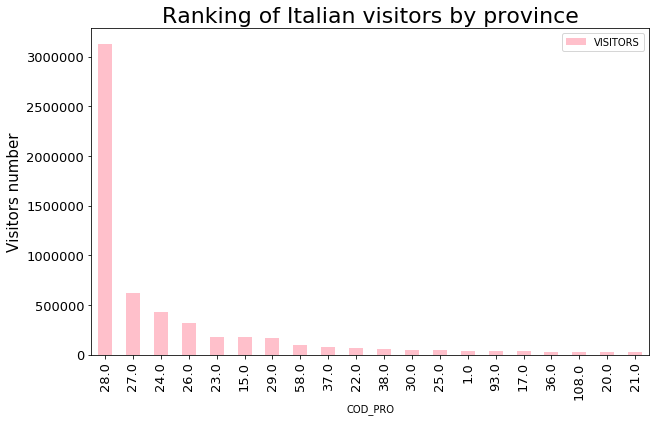

In [104]:
###Anıl ile farklı sonra bak!!!
ax = dff.plot(kind='bar', figsize=(10,6), color="pink", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Ranking of Italian visitors by province", fontsize=22)
ax.set_ylabel("Visitors number", fontsize=15);
plot.show()

In [108]:
import pandas as pd

# read the data from the csv file
data = pd.read_csv("/Users/elifseven/Desktop/pythonProject/LCP_projects_Y2-Group6/data/day_od.csv",encoding='UTF-16 LE')

data = data[(data['COD_PRO'] == 15) |
            (data['COD_PRO'] == 1 ) | 
            (data['COD_PRO'] == 37 )|
            (data['COD_PRO'] == 58 )|
            (data['COD_PRO'] == 27 )|
            (data['COD_PRO'] == 32 )
           ]

data

,MONTH,DOW,ORIGIN,DESTINATION,CUST_CLASS,COD_COUNTRY,COD_PRO,PRO_COM,FLOW
13,Maggio,Venerdì,117,300,visitor,222,27.0,-999.0,118
34,Febbraio,Mercoledì,217,105,visitor,222,27.0,-999.0,39
46,Maggio,Sabato,101,300,visitor,222,27.0,27012.0,82
49,Maggio,Mercoledì,126,300,visitor,222,27.0,27037.0,44
52,Marzo,Martedì,300,111,visitor,222,27.0,27042.0,36
...,...,...,...,...,...,...,...,...,...
193438,Maggio,Mercoledì,125,300,visitor,222,15.0,-999.0,32
193457,Aprile,Mercoledì,101,300,visitor,222,27.0,27038.0,36
193470,Marzo,Venerdì,300,107,visitor,222,27.0,27043.0,40
193471,Febbraio,Lunedì,121,300,visitor,222,32.0,32006.0,32


In [24]:
data1 = data.groupby(['COD_PRO'])[["FLOW"]].sum()

data1

,FLOW
COD_PRO,
1.0,22928
15.0,114550
27.0,947453
32.0,6620
37.0,39719
58.0,56728


<BarContainer object of 3 artists>

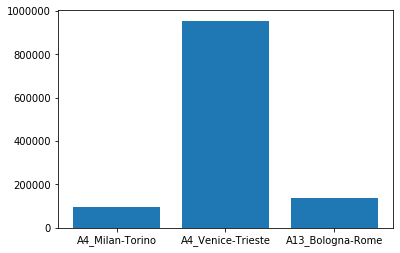

In [12]:
import matplotlib.pyplot as plt

A13_bolog_rom = (data1.FLOW.iloc[4]) + (data1.FLOW.iloc[5])
A4_venic_trie = (data1.FLOW.iloc[2]) + (data1.FLOW.iloc[3])
A13_mil_turin = (data1.FLOW.iloc[1]) + (data1.FLOW.iloc[0])

road = [A13_bolog_rom,A4_venic_trie,A13_mil_turin]
plt.bar(["A4_Milan-Torino","A4_Venice-Trieste","A13_Bologna-Rome"],road)


In [5]:
search_values = ['Sabato','Domenica']
data2 = data[data.DOW.str.contains('|'.join(search_values ))]


data2

,MONTH,DOW,ORIGIN,DESTINATION,CUST_CLASS,COD_COUNTRY,COD_PRO,PRO_COM,FLOW
46,Maggio,Sabato,101,300,visitor,222,27.0,27012.0,82
133,Aprile,Domenica,300,118,visitor,222,15.0,15146.0,86
154,Marzo,Sabato,300,118,visitor,222,27.0,27028.0,64
269,Marzo,Sabato,300,125,visitor,222,15.0,-999.0,56
270,Aprile,Domenica,114,300,visitor,222,15.0,15146.0,37
...,...,...,...,...,...,...,...,...,...
193150,Aprile,Sabato,300,120,visitor,222,1.0,-999.0,32
193217,Aprile,Domenica,300,124,visitor,222,27.0,27038.0,48
193261,Aprile,Sabato,102,300,visitor,222,27.0,27043.0,32
193263,Febbraio,Domenica,300,120,visitor,222,58.0,58091.0,32


In [7]:
data_filtering_weekend = data2.groupby(['COD_PRO'])[["FLOW"]].sum()

data_filtering_weekend

,FLOW
COD_PRO,
1.0,6851
15.0,38057
27.0,177648
32.0,1405
37.0,11527
58.0,17588


<BarContainer object of 3 artists>

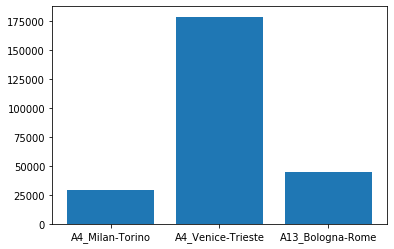

In [200]:
A13_bolog_rom = (data_filtering_weekend.FLOW.iloc[4]) + (data_filtering_weekend.FLOW.iloc[5])
A4_venic_trie = (data_filtering_weekend.FLOW.iloc[2]) + (data_filtering_weekend.FLOW.iloc[3])
A13_mil_turin = (data_filtering_weekend.FLOW.iloc[1]) + (data_filtering_weekend.FLOW.iloc[0])

road_with_weekend = [A13_bolog_rom,A4_venic_trie,A13_mil_turin]
plt.bar(["A4_Milan-Torino","A4_Venice-Trieste","A13_Bologna-Rome"],road_with_weekend)

In [9]:
search_values2 = ['Lunedì','Martedì','Mercoledì','Giovedì','Venerdì']
data3 = data[data.DOW.str.contains('|'.join(search_values2 ))]

data3

,MONTH,DOW,ORIGIN,DESTINATION,CUST_CLASS,COD_COUNTRY,COD_PRO,PRO_COM,FLOW
13,Maggio,Venerdì,117,300,visitor,222,27.0,-999.0,118
34,Febbraio,Mercoledì,217,105,visitor,222,27.0,-999.0,39
49,Maggio,Mercoledì,126,300,visitor,222,27.0,27037.0,44
52,Marzo,Martedì,300,111,visitor,222,27.0,27042.0,36
55,Febbraio,Martedì,300,118,visitor,222,15.0,-999.0,65
...,...,...,...,...,...,...,...,...,...
193438,Maggio,Mercoledì,125,300,visitor,222,15.0,-999.0,32
193457,Aprile,Mercoledì,101,300,visitor,222,27.0,27038.0,36
193470,Marzo,Venerdì,300,107,visitor,222,27.0,27043.0,40
193471,Febbraio,Lunedì,121,300,visitor,222,32.0,32006.0,32


In [10]:
data_filtering_weekday = data3.groupby(['COD_PRO'])[["FLOW"]].sum()

data_filtering_weekday

,FLOW
COD_PRO,
1.0,16077
15.0,76493
27.0,769805
32.0,5215
37.0,28192
58.0,39140


<BarContainer object of 3 artists>

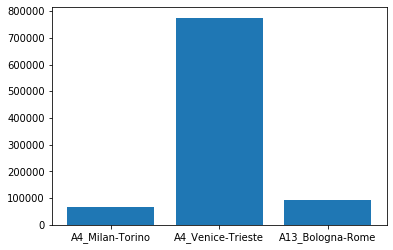

In [11]:
A13_bolog_rom = (data_filtering_weekday.FLOW.iloc[4]) + (data_filtering_weekday.FLOW.iloc[5])
A4_venic_trie = (data_filtering_weekday.FLOW.iloc[2]) + (data_filtering_weekday.FLOW.iloc[3])
A13_mil_turin = (data_filtering_weekday.FLOW.iloc[1]) + (data_filtering_weekday.FLOW.iloc[0])

road_with_weekday = [A13_bolog_rom,A4_venic_trie,A13_mil_turin]
plt.bar(["A4_Milan-Torino","A4_Venice-Trieste","A13_Bologna-Rome"],road_with_weekday)

In [15]:
import pandas as pd
data5 = pd.read_csv("/Users/elifseven/Desktop/pythonProject/LCP_projects_Y2-Group6/data/day_od.csv",encoding='UTF-16 LE')




In [19]:

dff = data5.groupby(['ORIGIN'])[["FLOW"]].sum()

dff

,FLOW
ORIGIN,
101,1244828
102,978561
103,346043
104,235347
105,896546
106,1439344
107,542570
108,608200
109,419517


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122807e90>]],
      dtype=object)

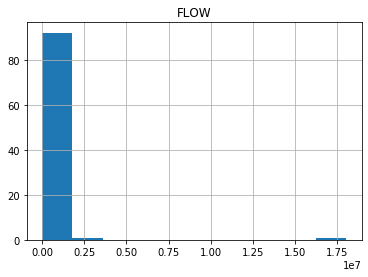

In [11]:
import matplotlib.pyplot as plt


import seaborn as sns

dff.hist(column='FLOW')


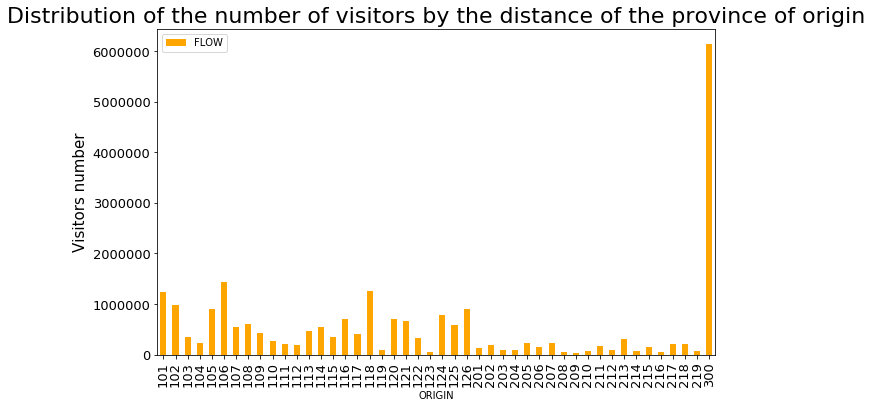

In [21]:
ax2 = dff.plot(kind='bar', figsize=(10,6), color="orange", fontsize=13);
ax2.set_alpha(0.8)
ax2.set_title("Distribution of the number of visitors by the distance of the province of origin", fontsize=22)
ax2.set_ylabel("Visitors number", fontsize=15);
plt.show()

In [2]:
######################5-
import  pandas as pd
data_veneto=pd.read_csv("/Users/elifseven/Desktop/pythonProject/LCP_projects_Y2-Group6/data/Veneto.csv",delimiter=';',header=0,quoting=0,error_bad_lines=False,encoding="Latin-1")

data_veneto['Origine'] = data_veneto['Origine'].astype(str).str[:-3]
data_veneto['Total_Mete'] = data_veneto['Total_Mete'].astype(str).str[:6]
data_veneto['Destinazione'] = data_veneto['Destinazione'].astype(str).str[:5]

data_veneto_2 = data_veneto[(data_veneto['Destinazione'] == '28001')]
data_veneto_2



,Name,Origine,Destinazione,Total_Minu,Total_Mete
230,1042 - 28001,1042,28001,"190,52",355012
811,1043 - 28001,1043,28001,"208,02",379422
1395,1044 - 28001,1044,28001,"221,83",423144
1976,1045 - 28001,1045,28001,"212,89",403593
2554,1046 - 28001,1046,28001,"213,41",396718
...,...,...,...,...,...
4238482,62063 - 28001,62063,28001,"360,43",675613
4239066,62064 - 28001,62064,28001,"390,77",717218
4239644,62065 - 28001,62065,28001,"382,56",743759
4240225,62066 - 28001,62066,28001,"376,45",704874


In [3]:
data_distinct_user = pd.read_csv("/Users/elifseven/Desktop/pythonProject/LCP_projects_Y2-Group6/data/distinct_users_day.csv",encoding='latin1')
data_distinct_user['PRO_COM'] = data_distinct_user['PRO_COM'].astype(str).str[:-2]

data_distinct_user_2 = data_distinct_user.groupby(['PRO_COM'])[['VISITORS']].sum()

data_distinct_user_2
 

,VISITORS
PRO_COM,
100002,356
100003,164
100005,5112
100006,220
10001,436
...,...
99016,200
99017,284
99018,392


In [4]:
#5-
import  pandas as pd
data_comune = pd.read_csv("/Users/elifseven/Desktop/pythonProject/LCP_projects_Y2-Group6/data/codici_istat_comune.csv",encoding='latin1')

data_comune = data_comune[(data_comune['COMUNE_CAPOLUOGO'] == 1)]
data_comune['PRO_COM'] = data_comune['PRO_COM'].astype(str)

data_comune


,COD_PRO,PRO_COM,COMUNE,COMUNE_CAPOLUOGO
271,1,1272,Torino,1
393,2,2158,Vercelli,1
456,3,3106,Novara,1
564,4,4078,Cuneo,1
741,5,5005,Asti,1
...,...,...,...,...
7640,90,90064,Sassari,1
7705,91,91051,Nuoro,1
7744,92,92009,Cagliari,1
7797,95,95038,Oristano,1


In [5]:
merged_first = (data_veneto_2.merge(data_comune, left_on='Origine', right_on='PRO_COM')
        .reindex(columns=['PRO_COM', 'Destinazione','Total_Mete','COMUNE']))

print(merged_first)



   PRO_COM Destinazione Total_Mete       COMUNE
0     1272        28001     381587       Torino
1     6003        28001     323323  Alessandria
2     2158        28001     314338     Vercelli
3    26086        28001     69240,      Treviso
4    97042        28001     266729        Lecco
..     ...          ...        ...          ...
90   62008        28001     692191    Benevento
91   57059        28001     479605        Rieti
92   93033        28001     118634    Pordenone
93   60038        28001     548972    Frosinone
94   99014        28001     223239       Rimini

[95 rows x 4 columns]


In [8]:
merged_final = pd.merge(merged_first, data_distinct_user_2, on='PRO_COM', how='inner')
merged_final


,PRO_COM,Destinazione,Total_Mete,COMUNE,VISITORS
0,1272,28001,381587,Torino,23420
1,6003,28001,323323,Alessandria,1896
2,2158,28001,314338,Vercelli,860
3,26086,28001,"69240,",Treviso,39864
4,97042,28001,266729,Lecco,1900
...,...,...,...,...,...
89,62008,28001,692191,Benevento,792
90,57059,28001,479605,Rieti,472
91,93033,28001,118634,Pordenone,9120
92,60038,28001,548972,Frosinone,848


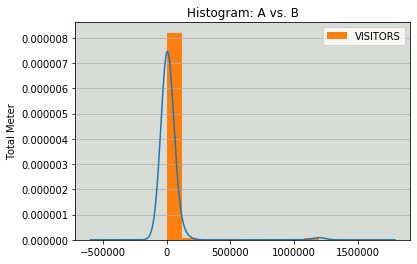

In [10]:
#pdd.to_csv(r'/Users/elifseven/Desktop/pythonProject/LCP_projects_Y2-Group6/data/result.csv', index = False)
import matplotlib.pyplot as plt  
fig, ax = plt.subplots()
merged_final.plot.kde(ax=ax, legend=False, title='Histogram: A vs. B')
merged_final.plot.hist(density=True, ax=ax)
ax.set_ylabel('Total Meter')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

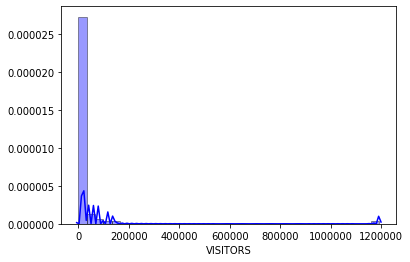

In [11]:
import seaborn as sns
metraj=merged_final.sort_values("Total_Mete",ascending=True)
# metraj=metraj.Total_Mete
visavis=metraj.VISITORS[1:94]
comunes=metraj.Total_Mete[1:94]

sns.distplot(visavis, hist=True, kde=True, bins=int(180/5), color = 'blue',hist_kws={'edgecolor':'black'});

In [31]:
merged_final_result = pd.read_csv("/Users/elifseven/Desktop/pythonProject/LCP_projects_Y2-Group6/data/result.csv",encoding='latin1')

merged_final_result


,PRO_COM,Destinazione,Total_Mete,COMUNE,VISITORS
0,1272,28001,381587,Torino,23420
1,6003,28001,323323,Alessandria,1896
2,2158,28001,314338,Vercelli,860
3,26086,28001,69240,Treviso,39864
4,97042,28001,266729,Lecco,1900
...,...,...,...,...,...
89,62008,28001,692191,Benevento,792
90,57059,28001,479605,Rieti,472
91,93033,28001,118634,Pordenone,9120
92,60038,28001,548972,Frosinone,848


In [12]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

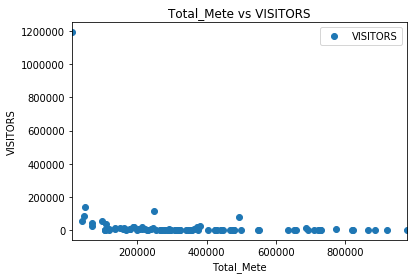

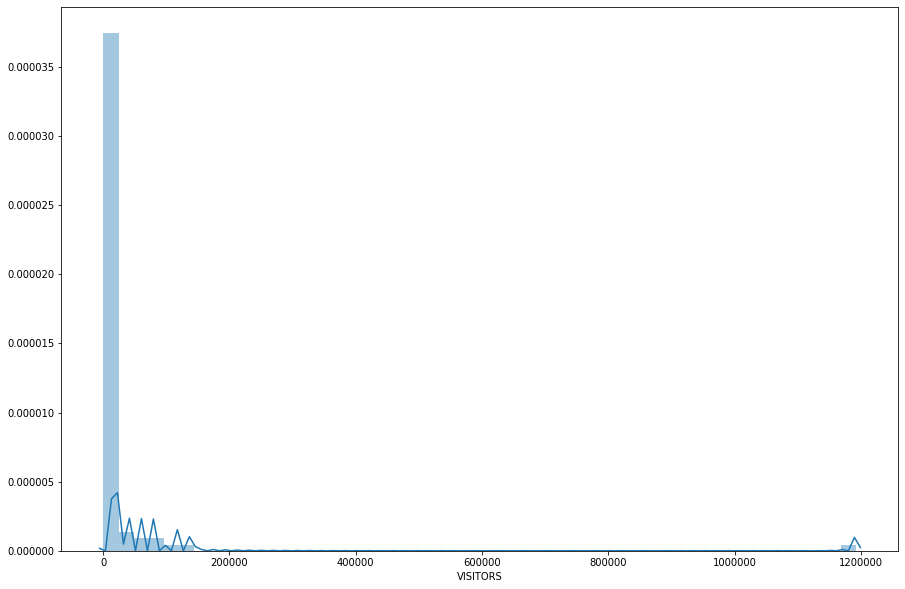

In [24]:
merged_final_result.shape
merged_final_result.describe()

merged_final_result.plot(x='Total_Mete', y='VISITORS', style='o')  
plt.title('Total_Mete vs VISITORS')  
plt.xlabel('Total_Mete')  
plt.ylabel('VISITORS')  
plt.show()



plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(merged_final_result['VISITORS'])

In [25]:
X = merged_final_result['Total_Mete'].values.reshape(-1,1)
y = merged_final_result['VISITORS'].values.reshape(-1,1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)


y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df



[74132.68126921]
[[-0.13182574]]


,Actual,Predicted
0,860,32694.841022
1,4428,26219.296899
2,1064,-19781.295948
3,3028,34978.062882
4,680,28574.495614
5,2080,-21852.673840
6,2440,8103.803364
7,744,-21116.822546
8,16588,49098.181813
9,1272,38845.302864


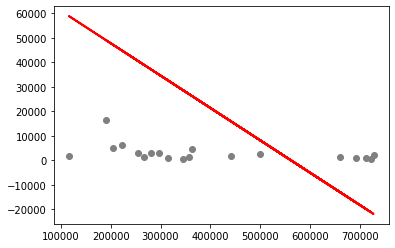

In [27]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [28]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 28261.574785949717
Mean Squared Error: 933469434.6681063
Root Mean Squared Error: 30552.732032800377


In [81]:
data11 = pd.read_csv("/Users/elifseven/Desktop/pythonProject/LCP_projects_Y2-Group6/data/distances_df6.csv",encoding='latin1')

data11

,Name,Total_Mete
0,1272 - 28001,381587
1,6003 - 28001,323323
2,2158 - 28001,314338
3,26086 - 28001,69240
4,97042 - 28001,266729
...,...,...
90,62008 - 28001,692191
91,57059 - 28001,479605
92,93033 - 28001,118634
93,60038 - 28001,548972
